# A tour of PyCIEMSS interfaces and functionality

### Load dependencies and interfaces

In [1]:
import os
import pyciemss
import torch
import pandas as pd

import pyciemss.visuals.plots as plots
import pyciemss.visuals.vega as vega
import pyciemss.visuals.trajectories as trajectories

smoke_test = ('CI' in os.environ)

### Select models and data

In [11]:
MODEL_PATH = "https://raw.githubusercontent.com/DARPA-ASKEM/simulation-integration/main/data/models/"
DATA_PATH = "https://raw.githubusercontent.com/DARPA-ASKEM/simulation-integration/main/data/datasets/"

model1 = os.path.join(MODEL_PATH, "SEIRHD_NPI_Type1_petrinet.json")
model2 = os.path.join(MODEL_PATH, "SEIRHD_NPI_Type2_petrinet.json")
model3 = os.path.join(MODEL_PATH, "SIR_stockflow.json")

dataset1 = os.path.join(DATA_PATH, "SIR_data_case_hosp.csv")
dataset2 = os.path.join(DATA_PATH, "traditional.csv")

### Set parameters for sampling

In [3]:
start_time = 0.0
end_time = 100.
logging_step_size = 10.0
num_samples = 3 if smoke_test else 1000

## Sample interface
Take `num_samples` number of samples from the (prior) distribution invoked by the chosen model.

### Sample from model 1

,timepoint_id,sample_id,persistent_beta_c_param,persistent_kappa_param,persistent_gamma_param,persistent_hosp_param,persistent_death_hosp_param,persistent_I0_param,D_state,E_state,H_state,I_state,R_state,S_state,infected_observable_state,exposed_observable_state,hospitalized_observable_state,dead_observable_state
0,0,0,0.537496,0.355925,0.15843,0.159121,0.077143,12.929663,0.362834,65.339256,5.004307,63.640892,55.641167,19339854.0,63.640892,65.339256,5.004307,0.362834
1,1,0,0.537496,0.355925,0.15843,0.159121,0.077143,12.929663,1.747269,173.091751,14.266052,169.032455,215.985001,19339478.0,169.032455,173.091751,14.266052,1.747269
2,2,0,0.537496,0.355925,0.15843,0.159121,0.077143,12.929663,5.486819,459.198151,37.984253,448.443695,642.230530,19338448.0,448.443695,459.198151,37.984253,5.486819
3,3,0,0.537496,0.355925,0.15843,0.159121,0.077143,12.929663,15.416653,1218.027954,100.783531,1189.584473,1773.108154,19335734.0,1189.584473,1218.027954,100.783531,15.416653
4,4,0,0.537496,0.355925,0.15843,0.159121,0.077143,12.929663,41.756851,3229.493408,267.302460,3154.655518,4772.562500,19328574.0,3154.655518,3229.493408,267.302460,41.756851


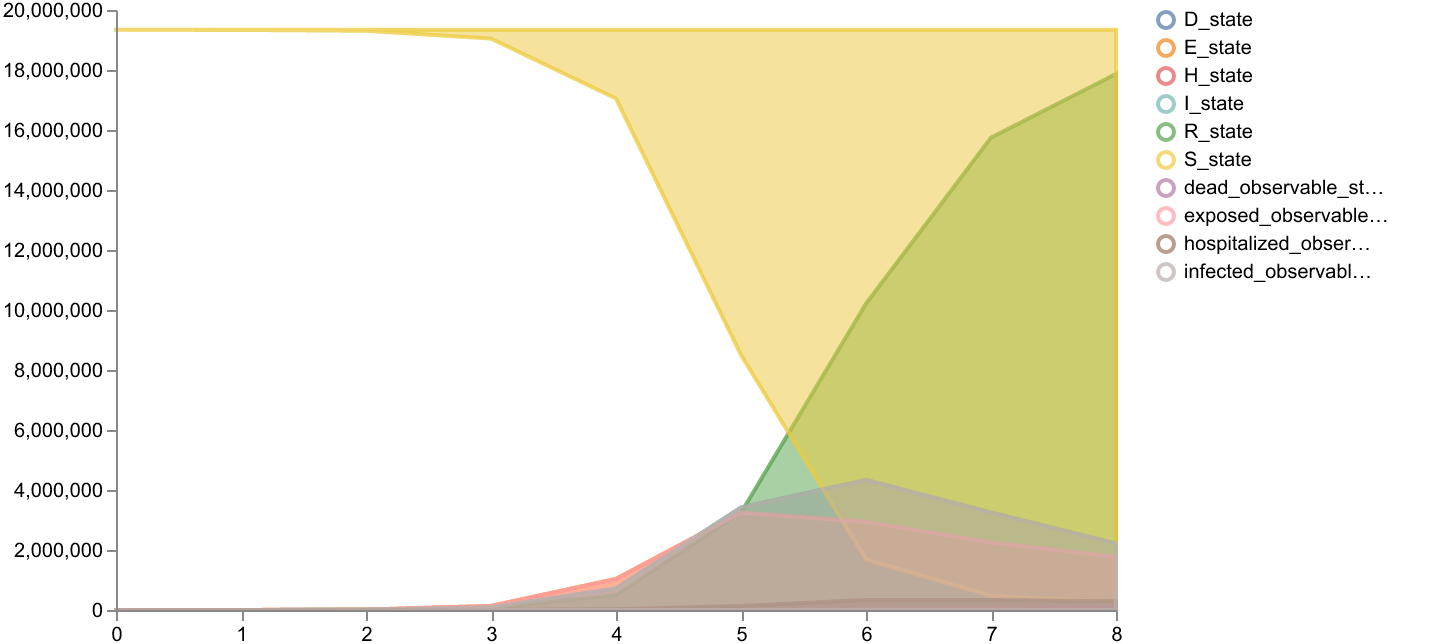

In [4]:
result1 = pyciemss.sample(model1, end_time, logging_step_size, num_samples, start_time=start_time)
display(result1['data'].head())

# Plot results for all states
schema = plots.trajectories(result1["data"], keep=".*_state")

# Plot results for cases, hospitalizations, and deaths only
# nice_labels={"dead_observable_state": "Deaths", 
#                  "hospitalized_observable_state": "Hospitalizations",
#                  "infected_observable_state": "Cases"
#                 }
# schema = plots.trajectories(result1["data"], 
#                            keep=["infected_observable_state", "hospitalized_observable_state", "dead_observable_state"], 
#                            relabel=nice_labels,
#                           )
plots.save_schema(schema, "_schema.json")
plots.ipy_display(schema, dpi=150)

### Sample from model 2

,timepoint_id,sample_id,persistent_beta_c_param,persistent_beta_nc_param,persistent_kappa_param,persistent_gamma_param,persistent_hosp_param,persistent_death_hosp_param,persistent_I0_param,D_state,E_state,H_state,I_state,R_state,S_state,infected_observable_state,exposed_observable_state,hospitalized_observable_state,dead_observable_state
0,0,0,0.727178,0.508342,0.448182,0.283736,0.178547,0.059005,2.00613,0.299446,44.282310,5.294769,31.384203,52.483917,19339900.0,31.384203,44.282310,5.294769,0.299446
1,1,0,0.727178,0.508342,0.448182,0.283736,0.178547,0.059005,2.00613,1.271053,87.574257,11.657029,62.193497,173.008209,19339710.0,62.193497,87.574257,11.657029,1.271053
2,2,0,0.727178,0.508342,0.448182,0.283736,0.178547,0.059005,2.00613,3.254646,173.352814,23.235697,123.113068,412.577087,19339304.0,123.113068,173.352814,23.235697,3.254646
3,3,0,0.727178,0.508342,0.448182,0.283736,0.178547,0.059005,2.00613,7.189330,343.132874,46.015854,243.693146,886.928101,19338512.0,243.693146,343.132874,46.015854,7.189330
4,4,0,0.727178,0.508342,0.448182,0.283736,0.178547,0.059005,2.00613,14.978730,679.121521,91.083031,482.329285,1825.849976,19336952.0,482.329285,679.121521,91.083031,14.978730


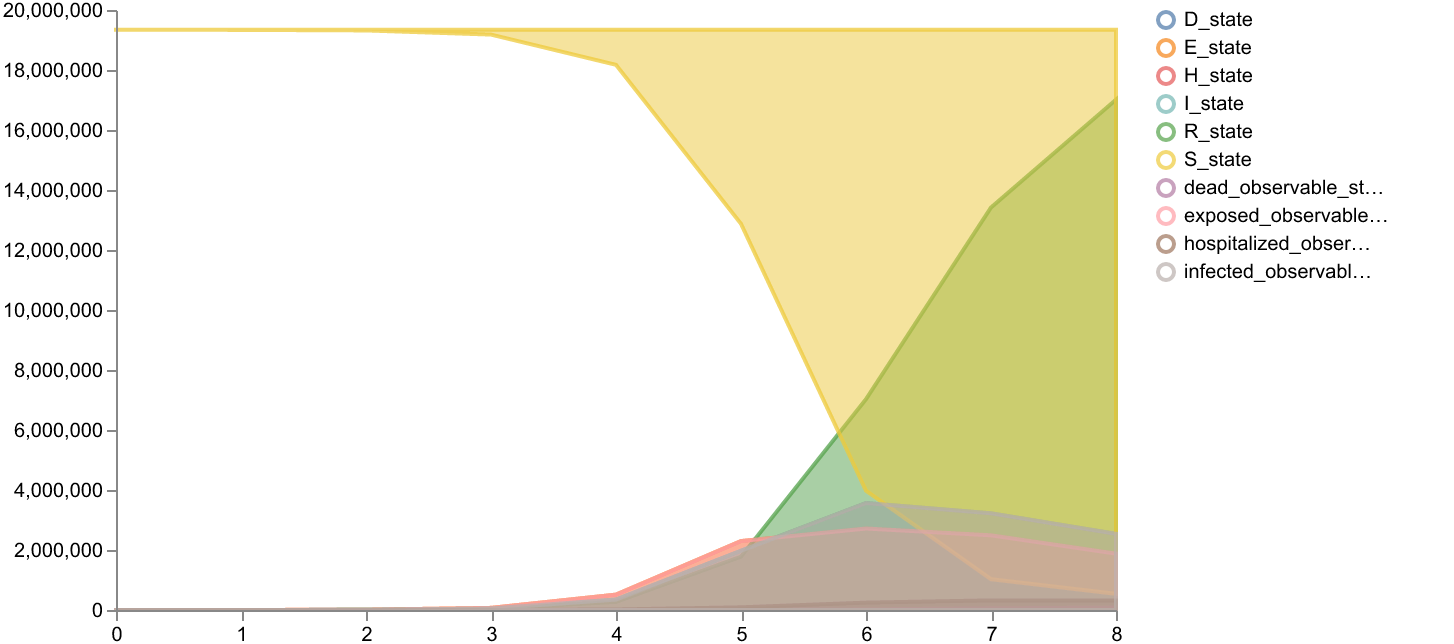

In [5]:
result2 = pyciemss.sample(model2, end_time, logging_step_size, num_samples, start_time=start_time)
display(result2['data'].head())

# Plot the result
schema = plots.trajectories(pd.DataFrame(result2["data"]), keep=".*_state")
plots.save_schema(schema, "_schema.json")
plots.ipy_display(schema, dpi=150)

## Ensemble Sample Interface
Sample from an ensemble of model 1 and model 2 

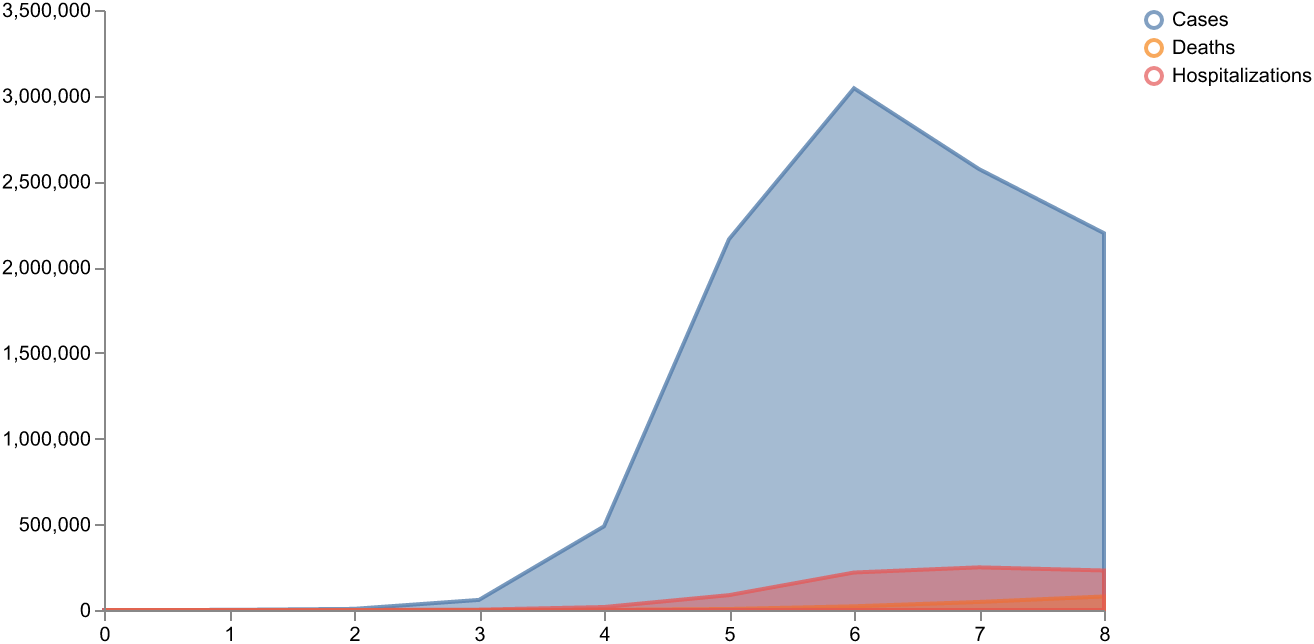

In [10]:
model_paths = [model1, model2]
solution_mappings = [lambda x : x, lambda x : x] # Conveniently, these two models operate on exactly the same state space, with the same names.

ensemble_result = pyciemss.ensemble_sample(model_paths, solution_mappings, end_time, logging_step_size, num_samples, start_time=start_time)
ensemble_result['data'].head()

# Plot the ensemble result for cases, hospitalizations, and deaths
nice_labels={"dead_state": "Deaths", 
                 "hospitalized_state": "Hospitalizations",
                 "infected_state": "Cases"
                }
schema = plots.trajectories(ensemble_result["data"], 
                           keep=["infected_state", "hospitalized_state", "dead_state"], 
                           relabel=nice_labels,
                          )
plots.save_schema(schema, "_schema.json")
plots.ipy_display(schema, dpi=150)

## Calibrate interface
Calibrate a model to a dataset by mapping model state varibale or observables to columns in the dataset

In [17]:
data_mapping = {"case": "I", "hosp": "H"} # data_mapping = "column_name": "observable/state_variable"
num_iterations = 10 if smoke_test else 1000
calibrated_results = pyciemss.calibrate(model1, dataset1, data_mapping=data_mapping, num_iterations=num_iterations)
parameter_estimates = calibrated_results["inferred_parameters"]
calibrated_results

{'inferred_parameters': AutoGuideList(
   (0): AutoDelta()
   (1): AutoLowRankMultivariateNormal()
 ),
 'loss': 74.87560293078423}

In [18]:
parameter_estimates()

{'persistent_beta_c': tensor(0.6311, grad_fn=<ExpandBackward0>),
 'persistent_kappa': tensor(0.6911, grad_fn=<ExpandBackward0>),
 'persistent_gamma': tensor(0.4750, grad_fn=<ExpandBackward0>),
 'persistent_hosp': tensor(0.1629, grad_fn=<ExpandBackward0>),
 'persistent_death_hosp': tensor(0.0399, grad_fn=<ExpandBackward0>),
 'persistent_I0': tensor(11.0570, grad_fn=<ExpandBackward0>)}

## Pass the parameter estimates to `sample` to sample from the calibrated model

In [ ]:
calibrated_sample_results = pyciemss.sample(model1, end_time, logging_step_size, num_samples, 
                start_time=start_time, inferred_parameters=parameter_estimates)
calibrated_sample_results

In [ ]:
# TODO:
# - Add intervention example
# - Add examples for calibrate_ensemble and optimize interfaces as they become available
# - Plot results

## Sample interface with intervention

In [ ]:
start_time = 0.0
end_time = 40.
logging_step_size = 1.0
num_samples = 5 if smoke_test else 1000
result = pyciemss.sample(model3, end_time, logging_step_size, num_samples, start_time=start_time, 
                         static_parameter_interventions={torch.tensor(1.): {"p_cbeta": torch.tensor(0.35)}}, solver_method="euler")
result["data"]

### Optimize interface
Get infections below 300 individuals at 100 days for SIR model with minimum change to current value for intervention parameter

In [ ]:
import numpy as np
from typing import Dict, List

def obs_nday_average_qoi(
    samples: Dict[str, torch.Tensor], contexts: List, ndays: int = 7
) -> np.ndarray:
    """
    Return estimate of last n-day average of each sample.
    samples is is the output from a Pyro Predictive object.
    samples[VARIABLE] is expected to have dimension (nreplicates, ntimepoints)
    Note: last ndays timepoints is assumed to represent last n-days of simulation.
    """
    dataQoI = samples[contexts[0]].detach().numpy()

    return np.mean(dataQoI[:, -ndays:], axis=1)

start_time = 0.0
end_time = 40.
logging_step_size = 1.0
observed_params = ["I_state"]
intervention_time = torch.tensor(1.)
intervened_params = "p_cbeta"
p_cbeta_current = 0.35
initial_guess_interventions = 0.15
bounds_interventions = [[0.1], [0.5]]

risk_bound = 300.
qoi = lambda x: obs_nday_average_qoi(x, observed_params, 1)
objfun = lambda x: np.abs(p_cbeta_current-x)
static_parameter_interventions = {intervention_time: intervened_params}

opt_result = pyciemss.optimize(model3, end_time, logging_step_size, qoi, risk_bound, static_parameter_interventions, objfun, 
                               initial_guess_interventions=initial_guess_interventions, bounds_interventions=bounds_interventions, 
                               start_time=0.0, n_samples_ouu=int(1e2), maxiter=1, maxfeval=20, solver_method="euler")
print(f'Optimal policy for intervening on {static_parameter_interventions[list(static_parameter_interventions.keys())[0]]} is ', opt_result["policy"])

#### Sample using optimal policy as intervention

In [ ]:
num_samples = 10 if smoke_test else 100
result = pyciemss.sample(model3, end_time, logging_step_size, num_samples, start_time=start_time, 
                         static_parameter_interventions={intervention_time: {intervened_params: opt_result["policy"]}}, 
                         solver_method="euler")
result["data"]